<a href="https://colab.research.google.com/github/dream80/DeepFaceLab_Colab/blob/master/DeepFaceLab_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Nothing to say , just run run run  it    --tony

# Step 1 Upload your *workspace* to Google Drive


1. Create a directory called ***DeepFaceLab*** in the root directory of Google Cloud.
2. Upload ***workspace.zip*** to ***DeepFaceLab***  
3. Mount Google Drive as folder
4. Enter the directory by command



In [0]:
#Mount Google Drive as folder

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

In [0]:
# Enter the directory 
%cd /content/drive/My Drive/DeepFaceLab/

In [0]:
# Only run for the first time
!unzip workspace.zip

#Step 2  Install DFL


In [0]:
#Clone stable master branch(recommended)

!git clone https://github.com/dream80/DeepFaceLab_Colab.git

In [0]:
# Into DeepFaceLab_Colab
%cd /content/drive/My Drive/DeepFaceLab/DeepFaceLab_Colab

#Pull updates from repository
!git pull


In [0]:
%cd /content/drive/My Drive/DeepFaceLab/DeepFaceLab_Colab

#Install requirements tenser 1.13.1
!pip install -r requirements_colab.txt
!pip install --upgrade scikit-image

# Step 3. Extract faces

In [0]:
# Into DeepFaceLab_Colab

%cd /content/drive/My Drive/DeepFaceLab/DeepFaceLab_Colab

In [0]:
#Extract frames from DST video

!python main.py videoed extract-video --input-file ../workspace/data_dst.mp4 --output-dir ../workspace/data_dst/

In [0]:
#Extract Face from data_dst

!python main.py extract --input-dir ../workspace/data_dst --output-dir ../workspace/data_dst/aligned --detector s3fd --debug-dir ../workspace/data_dst/aligned_debug

In [0]:
#Sort by histogram DST faces

!python main.py sort --input-dir ../workspace/data_dst/aligned --by hist

In [0]:
#Extract frames from SRC video

!python main.py videoed extract-video --input-file ../workspace/data_src.mp4 --output-dir ../workspace/data_src/

In [0]:
#Extract Face from data_src

!python main.py extract --input-dir ../workspace/data_src --output-dir ../workspace/data_src/aligned --detector s3fd --debug-dir ../workspace/data_src/aligned_debug

In [0]:
#Sort by histogram SRC faces

!python main.py sort --input-dir ../workspace/data_src/aligned --by hist

# Step 4. Train model


*  Not only SAE, H128 is also possible
*   For stop training you need manually interrupt execution. You get error in output, but model will be saved.


In [0]:
# Running trainer  H128

!python main.py train --training-data-src-dir ../workspace/data_src/aligned --training-data-dst-dir ../workspace/data_dst/aligned --model-dir ../workspace/model --model H128 --no-preview

In [0]:
# Running trainer. SAE 

!python main.py train --training-data-src-dir ../workspace/data_src/aligned --training-data-dst-dir ../workspace/data_dst/aligned --model-dir ../workspace/model --model SAE --no-preview

1.13.1


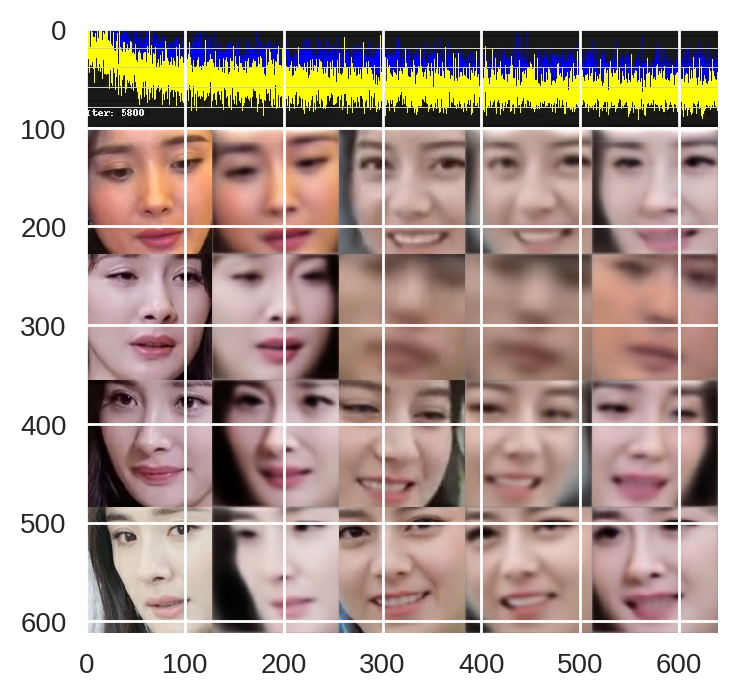

In [2]:
#@title
# For preview, training must be stopped
# You can also view it in parallel with another .ipynb.  
#https://github.com/dream80/DeepFaceLab_Colab/blob/master/ViewLastHistory_H128.ipynb

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from google.colab import files
 
print(tf.__version__)

imgpath="/content/drive/My Drive/DeepFaceLab/workspace/model/H128_history/"
tlist=os.listdir(imgpath)
tlist.sort(key=lambda x:int(x[:-5]))
lastpic=tlist[-1]

image_raw = tf.gfile.GFile(imgpath+lastpic,'rb').read()   #bytes
img = tf.image.decode_jpeg(image_raw)  #Tensor

plt.rcParams['figure.figsize'] = (8, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray' 
plt.rcParams['savefig.dpi'] =200 
plt.rcParams['figure.dpi'] = 200



with tf.Session() as sess:
    plt.imshow(img.eval())
 

# Step 5. Convert frames

In [0]:
#Convert 
!python main.py convert --input-dir ../workspace/data_dst --output-dir ../workspace/data_dst/merged --aligned-dir ../workspace/data_dst/aligned --model-dir ../workspace/model --model H128

In [0]:
#Convert frames to result video 

!python main.py videoed video-from-sequence --input-dir ../workspace/data_dst/merged --output-file ../workspace/result.mp4 --reference-file ../workspace/data_dst.mp4

# Others

You can see the results of each step on google Drive

https://drive.google.com/drive/my-drive

If you have any questions, you can contact wpgdream@gmail.com